<a href="https://colab.research.google.com/github/baghelratan/Smart_Irrigation/blob/main/Irrigation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

In [4]:
# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")

In [5]:

# first 5 rows to be printed
df.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [6]:
# Last 5 rows to be printed
df.tail()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
1995,1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,...,1.0,2.0,3.0,2.0,1.0,1.0,0.0,0,0,0
1996,1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,...,3.0,3.0,0.0,1.0,0.0,6.0,2.0,1,1,1
1997,1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,...,2.0,3.0,4.0,4.0,4.0,1.0,0.0,1,0,0
1998,1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,...,2.0,4.0,0.0,2.0,0.0,3.0,0.0,0,1,0
1999,1999,0.0,1.0,4.0,1.0,2.0,2.0,6.0,8.0,5.0,...,2.0,1.0,1.0,0.0,5.0,2.0,1.0,1,1,1


In [7]:
# information of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [8]:
#column present in data frame
df.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [9]:
#to remove specified labels from rows or columns in a DataFrame

df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [10]:

df.describe() # Statistics of the dataset

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,3.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,9.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [11]:
# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------

X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

In [12]:
# to take a random sample of 10 elements from a dataset or vector.
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
1347,1.0,3.0,4.0,3.0,3.0,2.0,0.0,6.0,1.0,2.0,3.0,4.0,3.0,4.0,6.0,0.0,2.0,1.0,0.0,2.0
1115,1.0,1.0,3.0,4.0,2.0,2.0,2.0,7.0,1.0,2.0,1.0,2.0,5.0,5.0,7.0,0.0,2.0,0.0,4.0,1.0
1793,1.0,2.0,4.0,2.0,1.0,1.0,6.0,6.0,0.0,2.0,1.0,7.0,5.0,3.0,2.0,0.0,3.0,1.0,0.0,2.0
998,2.0,0.0,4.0,2.0,1.0,2.0,2.0,5.0,1.0,2.0,1.0,7.0,7.0,3.0,5.0,1.0,1.0,3.0,0.0,3.0
521,0.0,1.0,2.0,4.0,4.0,1.0,8.0,4.0,1.0,0.0,10.0,5.0,2.0,1.0,6.0,0.0,1.0,3.0,4.0,1.0
340,1.0,0.0,2.0,3.0,1.0,0.0,4.0,7.0,1.0,0.0,3.0,2.0,7.0,0.0,5.0,2.0,3.0,1.0,1.0,0.0
1401,1.0,1.0,3.0,5.0,3.0,1.0,2.0,5.0,1.0,2.0,3.0,4.0,8.0,5.0,5.0,1.0,0.0,0.0,3.0,3.0
655,0.0,0.0,4.0,0.0,1.0,2.0,5.0,5.0,3.0,5.0,1.0,7.0,4.0,1.0,1.0,0.0,1.0,6.0,2.0,3.0
1096,1.0,3.0,3.0,3.0,3.0,2.0,3.0,5.0,1.0,0.0,2.0,4.0,6.0,1.0,3.0,0.0,4.0,0.0,1.0,3.0
1577,1.0,3.0,1.0,3.0,5.0,2.0,4.0,5.0,1.0,3.0,2.0,4.0,2.0,4.0,3.0,1.0,1.0,3.0,4.0,3.0


In [13]:
#randomly select 10 elements from the data in y
y.sample(10)

,parcel_0,parcel_1,parcel_2
1602,0,0,0
1420,0,0,0
1098,0,1,0
694,1,1,0
1449,1,1,0
1914,0,0,0
433,1,0,0
506,1,1,1
962,0,1,0
1448,0,1,0


In [14]:
#used to provide a concise summary of a DataFrame
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [15]:
# to print a concise summary of a DataFrame
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [16]:
# all rows and columns
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [17]:
# all shape of x and y
X.shape, y.shape


((2000, 20), (2000, 3))

In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.125     , 0.22222222, 0.1       , ..., 0.09090909, 0.9       ,
        0.28571429],
       [0.625     , 0.11111111, 0.3       , ..., 0.18181818, 0.2       ,
        1.        ],
       [0.375     , 0.11111111, 0.4       , ..., 0.27272727, 0.1       ,
        0.        ],
       ...,
       [0.125     , 0.33333333, 0.3       , ..., 0.36363636, 0.1       ,
        0.        ],
       [0.25      , 0.11111111, 0.        , ..., 0.        , 0.3       ,
        0.        ],
       [0.        , 0.11111111, 0.4       , ..., 0.45454545, 0.2       ,
        0.14285714]])

In [19]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1600, 20), (400, 20), (1600, 3), (400, 3))

In [21]:
#train classifier
# Use Multioutputclassifer to hande multi-labelclassifcation
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
#custom hyperparametrer from randomforest
rf = RandomForestClassifier(
    n_estimators=200, #Number of trees
    max_depth=10,#maximum depth of each tree
    min_samples_split=4,# maximum sample to simple to split a node
    min_samples_leaf=2,# minimum samples per leaf
    max_features='sqrt',# number of features to consider to each split('auto','split','log2',or int)

    random_state=42
)
#wrap it with multioutput
model= MultiOutputClassifier(rf)
#train the model
model.fit(X_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_depth=10,
                                                       min_samples_leaf=2,
                                                       min_samples_split=4,
                                                       n_estimators=200,
                                                       random_state=42))

In [22]:
#evalute model
y_pred = model.predict(X_test)
print("classification report:")
print(classification_report(y_test,y_pred,target_names=y.columns))

classification report:
              precision    recall  f1-score   support

    parcel_0       0.87      0.93      0.90       256
    parcel_1       0.91      0.97      0.94       304
    parcel_2       0.93      0.48      0.64        87

   micro avg       0.89      0.89      0.89       647
   macro avg       0.90      0.80      0.83       647
weighted avg       0.90      0.89      0.88       647
 samples avg       0.82      0.79      0.79       647



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
print(df[['parcel_0','parcel_1','parcel_2']].sum())

parcel_0    1271
parcel_1    1461
parcel_2     424
dtype: int64


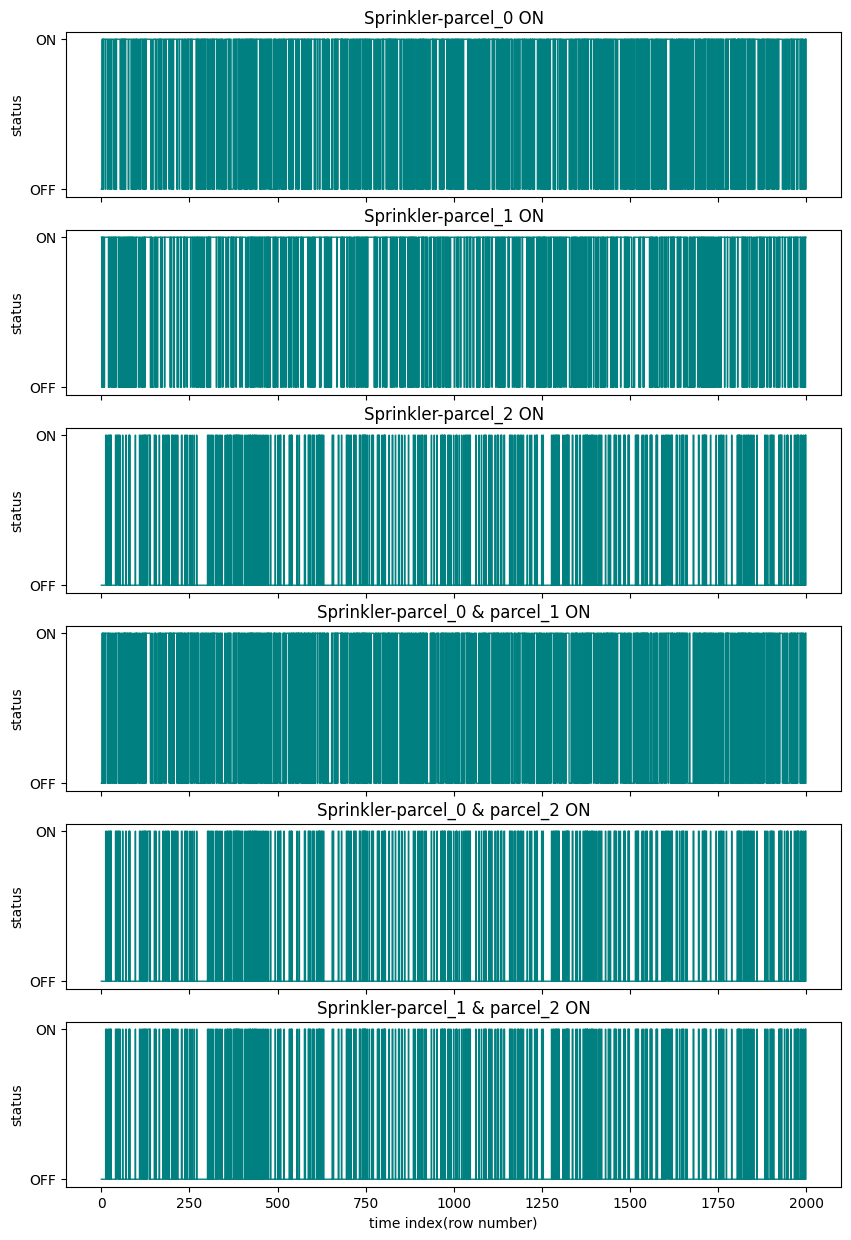

In [26]:
from multiprocessing import Condition
import matplotlib.pyplot as plt
#define parcel activation condition with descriptivr labels
Condition={
    "parcel_0 ON":df['parcel_0'],
    "parcel_1 ON":df['parcel_1'],
    "parcel_2 ON":df['parcel_2'],
    "parcel_0 & parcel_1 ON":df['parcel_0']&df['parcel_1'],
    "parcel_0 & parcel_2 ON":df['parcel_0']&df['parcel_2'],
    "parcel_1 & parcel_2 ON":df['parcel_1']&df['parcel_2'],
}
#create vertically stacked subplot (one ,for each condition)
fig,axs=plt.subplots(nrows=len(Condition),figsize=(10,15),sharex=True)
#loop though each condition to plot corresponding square wave
for ax, (title, Condition) in zip(axs,Condition.items()):
    ax.step(df.index,Condition.astype(int), where = 'post',linewidth=1,color='teal')
    ax.set_title(f"Sprinkler-{title}")
    ax.set_ylabel("status")
    ax.set_yticks([0,1])
    ax.set_yticklables(['OFF','ON'])
#label x-axis on the last subplot
axs[-1].set_xlabel("time index(row number)")
#plot
plt.show()

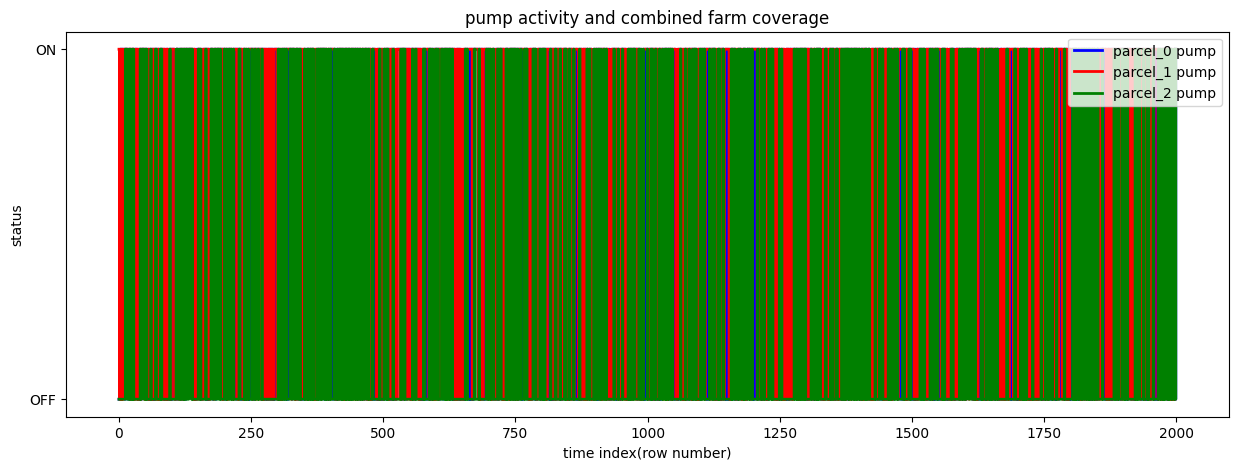

In [29]:
#calculate combined activity of all pumps (overlap)
any_pump_on=(df['parcel_0']==1)|(df['parcel_1']==1)|(df['parcel_2']==1)
#create subplot
plt.figure(figsize=(15,5))
#plot individual pump statuses
plt.step(df.index,df['parcel_0'],where='post',linewidth=2,label='parcel_0 pump',color='blue')
plt.step(df.index,df['parcel_1'],where='post',linewidth=2,label='parcel_1 pump',color='red')
plt.step(df.index,df['parcel_2'],where='post',linewidth=2,label='parcel_2 pump',color='green')
plt.title("pump activity and combined farm coverage")
plt.xlabel("time index(row number)")
plt.ylabel("status")
plt.yticks([0,1],['OFF','ON'])

plt.legend(loc ='upper right')
plt.show()

In [30]:
import joblib
from sklearn.pipeline import Pipeline
joblib.dump(model,"farm_irrigation_system.pkl")

['farm_irrigation_system.pkl']